# Курсовая работа
## Выполнил студент группы БВТ2102 Никифорова Олеся Ильинична

Написать программу, которая будет считывать данные из CSV файла, содержащего
информацию о продажах товаров в магазине.

Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.

Для решения задач необходимо использовать структуры данных, такие как массивы и
хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в
соответствии с требованиями.



In [65]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv

In [153]:
with open("/Users/nikiforova.olesya/Desktop/сиаод/kursach/table.csv") as f:
    arr = f.read().split("\n")

data = []

for line in arr:
    row = line.split(';')
    data.append(row)

# for line in data:
#   print(line) 

n = len(data)
m = len(row)

for i in range(1, n):
    for j in range(m):
        if data[i][j] == '':
            print('Данные введены некорректно.')
            
for j in range(m):
    if data[0][j] == 'Название товара':
        name = j
    if data[0][j] == 'Количество продаж':
        amount = j
    if data[0][j] == 'Общая стоимость':
        total = j
    if data[0][j] == 'Цена за единицу':
        pr = j

for i in range(1, n):
    if int(data[i][pr])*int(data[i][amount]) != int(data[i][total]):
        print('Некорректные данные для товара:')
        print(data[i])


### Задание №1
Рассчитать общую выручку магазина.

In [142]:
profit = 0

for i in range(1, n):
    profit += int(data[i][-1])

print(profit, 'руб')

241969500 руб


### Задание №2
Найти товар, который был продан наибольшее количество раз.

In [147]:
max_amount = int(data[-1][amount])

for i in range(1, n):
    if max_amount <= int(data[i][amount]):
        max_amount = int(data[i][amount])

for i in range(1, n):
    if int(data[i][amount]) == max_amount:
        print(data[i][name], ': ', data[i][amount], ' шт', sep="")

    

Apple iPhone 14: 500 шт
Philips Hue Smart Bulbs: 500 шт


### Задание №3
Найти товар, который принес наибольшую выручку.

In [149]:
# сортировка пузырьком
for i in range(1, n-1):
        for k in range(1, n-1-i):
            if int(data[k][total]) < int(data[k+1][total]):
                data[k], data[k+1] = data[k+1], data[k]


for i in range(1, n):
    if int(data[i][total]) == int(data[1][total]):
        print(data[i][name], ': ', data[i][total], ' руб', sep="")



Apple iPhone 14: 44995000 руб


### Задание №4
Составить отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товар и доле каждого товара в общей выручке.


In [141]:
print('Общая выручка магазина составила', profit, 'руб')
print('Количество и процентное соотношение выручки каждого товара от общей выручки:')
per = []
for i in range(1, n):
    per.append(round((int(data[i][total]) / profit * 100), 2))
    
for i in range(1, n):
    print(data[i][name], ': ', data[i][total], ' руб (', data[i][amount], ' шт; ',per[i - 1], ' %)', sep="")


Общая выручка магазина составила 241969500 руб
Количество и процентное соотношение выручки каждого товара от общей выручки:
Apple iPhone 14: 44995000 руб (500 шт; 18.6 %)
Samsung Galaxy S22 Ultra: 29997000 руб (300 шт; 12.4 %)
LG OLED TV: 26998500 руб (150 шт; 11.16 %)
Canon EOS R8: 22499250 руб (75 шт; 9.3 %)
Apple MacBook Pro 16: 19999000 руб (100 шт; 8.27 %)
Apple iPad Pro 12.9: 17998000 руб (200 шт; 7.44 %)
DJI Ronin 4D: 12499750 руб (25 шт; 5.17 %)
Canon EOS R7: 12499500 руб (50 шт; 5.17 %)
Игровые приставки: 11998000 руб (200 шт; 4.96 %)
Samsung Galaxy Book Pro: 6499500 руб (50 шт; 2.69 %)
Sony PlayStation 5 Pro: 5999000 руб (100 шт; 2.48 %)
Samsung Galaxy Tab S8: 5249250 руб (75 шт; 2.17 %)
LG UltraFine: 4999500 руб (50 шт; 2.07 %)
Samsung Galaxy Watch 5: 4498500 руб (150 шт; 1.86 %)
DJI Mavic 3: 3749750 руб (25 шт; 1.55 %)
Bose QuietComfort 55: 3499000 руб (100 шт; 1.45 %)
Bose SoundLink Revolve+: 2499000 руб (100 шт; 1.03 %)
Philips Sonicare DiamondClean: 1998000 руб (200 шт; 

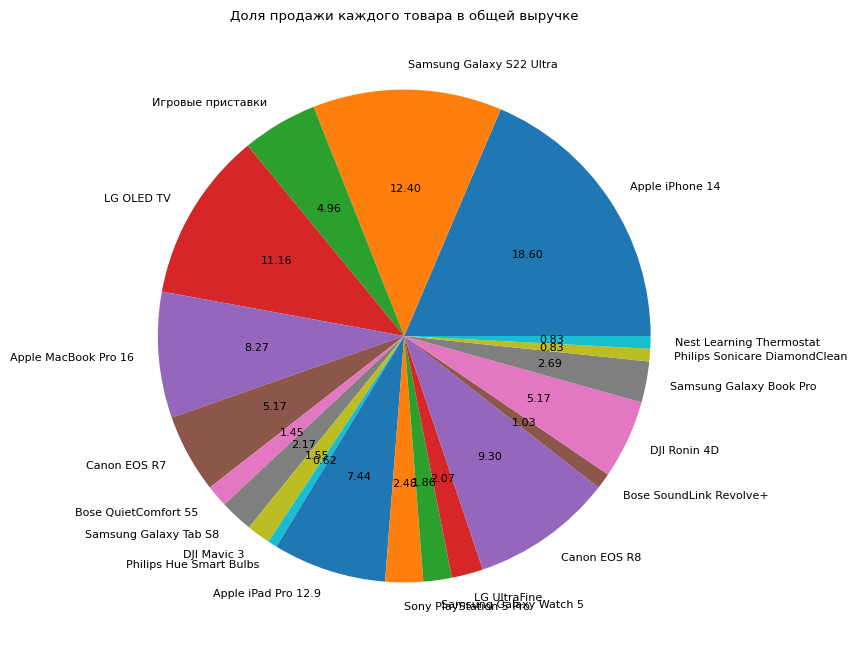

In [110]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

goods = []
count = []
price = []

for i in range(1, n):
    goods.append(data[i][name])
    count.append(data[i][amount])
    price.append(data[i][total])

plt.title('Доля продажи каждого товара в общей выручке')    
plt.rc('font', size=8)    
ax.pie(price, labels=goods, autopct='%.2f')


ax.grid()

plt.show()

### Вывод
